# **Data preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# import data
trained = pd.read_csv('data/train_count.csv')
test = pd.read_csv('data/dev_count.csv')

In [3]:
trained.head()

,sentiment,tweet_id,tweet
0,neg,1,"[(3083, 1), (3245, 1), (4054, 1)]"
1,neg,2,"[(679, 1), (1513, 1), (2663, 1), (3419, 1), (4..."
2,neg,3,"[(225, 1), (1480, 1), (2995, 1), (3162, 1), (3..."
3,neg,4,"[(1748, 1), (1811, 1), (2189, 1), (2427, 1)]"
4,neg,5,"[(1788, 1), (1789, 1), (2011, 1), (2029, 1), (..."


In [4]:
test.head()

,sentiment,tweet_id,tweet
0,neg,160001,"[(1448, 1), (1896, 1), (2456, 1), (4054, 1), (..."
1,neg,160002,"[(1686, 1), (2715, 1), (4089, 1), (4682, 1), (..."
2,pos,160003,"[(2707, 1), (2898, 1), (3507, 2), (4040, 1), (..."
3,pos,160004,"[(1180, 1), (1202, 1), (1622, 1), (1655, 1), (..."
4,neu,160005,"[(1783, 1), (2069, 1), (2416, 1)]"


In [5]:
y_train = trained['sentiment'].tolist()
y_test = test['sentiment'].tolist()

In [6]:
# load unique vocabulary
vocab = pd.read_csv('data/vocab.txt', header=None, sep='\t')
vocab.columns = ['word', 'position']
vocab.head()

,word,position
0,oh,3083
1,sorry,4054
2,pets,3245
3,love,2663
4,prison,3419


# **Data Visualization**

## **Train Data**

In [7]:
train_pos_word = []
train_neu_word = []
train_neg_word = []

for i in range(len(trained)):
    curr_tweet = eval(trained['tweet'][i])
    curr_sentiment = trained['sentiment'][i]
    # postive word
    if curr_sentiment == 'pos':
        for j in range(len(curr_tweet)):
            curr_word_pos = curr_tweet[j][0]
            curr_word = vocab.loc[vocab['position']==curr_word_pos, 'word'].iloc[0]
            amt = curr_tweet[j][1]
            for s in range(amt):
                train_pos_word.append(curr_word)
    
    # neutral word  
    if curr_sentiment== 'neu':
        for j in range(len(curr_tweet)):
            curr_word_pos = curr_tweet[j][0]
            curr_word = vocab.loc[vocab['position']==curr_word_pos, 'word'].iloc[0]
            amt = curr_tweet[j][1]
            for s in range(amt):
                train_neu_word.append(curr_word)

    # negative word
    else:
        for j in range(len(curr_tweet)):
            curr_word_pos = curr_tweet[j][0]
            curr_word = vocab.loc[vocab['position']==curr_word_pos, 'word'].iloc[0]
            amt = curr_tweet[j][1]
            for s in range(amt):
                train_neg_word.append(curr_word)

train_pos_word= pd.Series(train_pos_word).str.cat(sep=' ')
train_neu_word= pd.Series(train_neu_word).str.cat(sep=' ')
train_neg_word= pd.Series(train_neg_word).str.cat(sep=' ')

### **Positve Tweets WordCloud in Train Data**

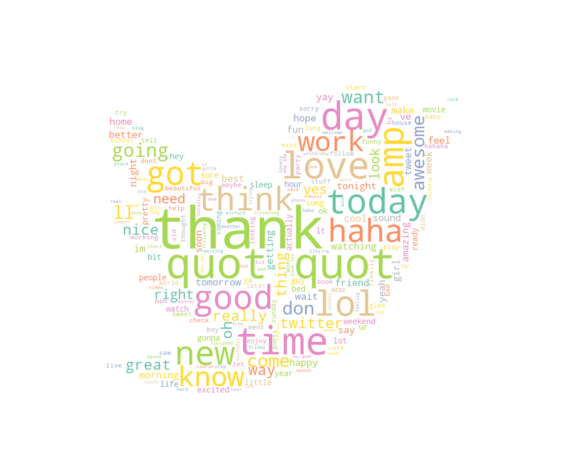

In [8]:
from PIL import Image
from wordcloud import WordCloud
# pos word plot
mask = np.array(Image.open('twitter-icon.jpeg'))
train_pos_wc = WordCloud(background_color='white', colormap='Set2', mask=mask).generate(train_pos_word)

plt.figure(figsize=(10,10), facecolor="w")
plt.imshow(train_pos_wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('output-images/BoW/Postive-Tweets-WordCloud-in-Train-Data.png')
plt.show()

### **Neutral Tweets WordCloud in Train Data**

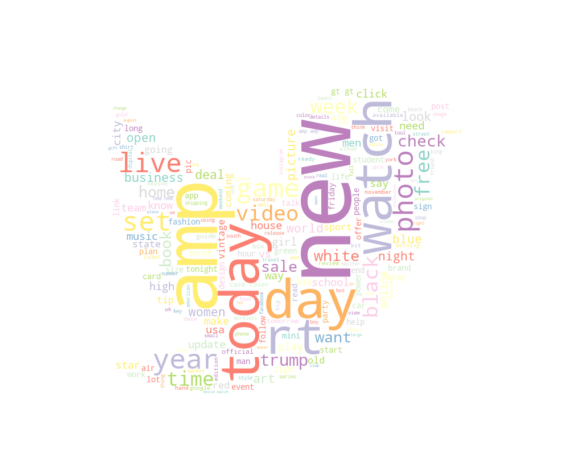

In [9]:
# neu word plot
mask = np.array(Image.open('twitter-icon.jpeg'))
train_neu_wc = WordCloud(background_color='white', colormap='Set3', mask=mask).generate(train_neu_word)

plt.figure(figsize=(10,10), facecolor="w")
plt.imshow(train_neu_wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('output-images/BoW/Neutral-Tweets-WordCloud-in-Train-Data.png')
plt.show()

### **Negative Tweets WordCloud in Train Data**

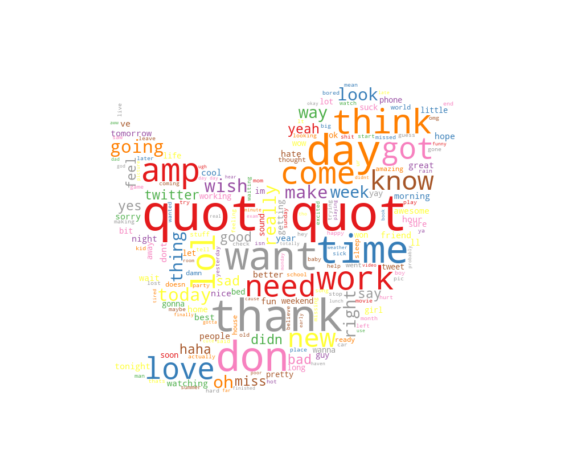

In [10]:
# negative word plot
mask = np.array(Image.open('twitter-icon.jpeg'))
train_neg_wc = WordCloud(background_color='white', colormap='Set1', mask=mask).generate(train_neg_word)

plt.figure(figsize=(10,10), facecolor="w")
plt.imshow(train_neg_wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('output-images/BoW/Negative-Tweets-WordCloud-in-Train-Data.png')
plt.show()

## **Test Data**

In [11]:
test_pos_word = []
test_neu_word = []
test_neg_word = []

for i in range(len(test)):
    curr_tweet = eval(test['tweet'][i])
    curr_sentiment = test['sentiment'][i]
    # postive word
    if curr_sentiment == 'pos':
        for j in range(len(curr_tweet)):
            curr_word_pos = curr_tweet[j][0]
            curr_word = vocab.loc[vocab['position']==curr_word_pos, 'word'].iloc[0]
            amt = curr_tweet[j][1]
            for s in range(amt):
                test_pos_word.append(curr_word)
    
    # neutral word  
    if curr_sentiment== 'neu':
        for j in range(len(curr_tweet)):
            curr_word_pos = curr_tweet[j][0]
            curr_word = vocab.loc[vocab['position']==curr_word_pos, 'word'].iloc[0]
            amt = curr_tweet[j][1]
            for s in range(amt):
                test_neu_word.append(curr_word)

    # negative word
    else:
        for j in range(len(curr_tweet)):
            curr_word_pos = curr_tweet[j][0]
            curr_word = vocab.loc[vocab['position']==curr_word_pos, 'word'].iloc[0]
            amt = curr_tweet[j][1]
            for s in range(amt):
                test_neg_word.append(curr_word)


test_pos_word= pd.Series(test_pos_word).str.cat(sep=' ')
test_neu_word= pd.Series(test_neu_word).str.cat(sep=' ')
test_neg_word= pd.Series(test_neg_word).str.cat(sep=' ')

### **Positve Tweets WordCloud in Test Data**

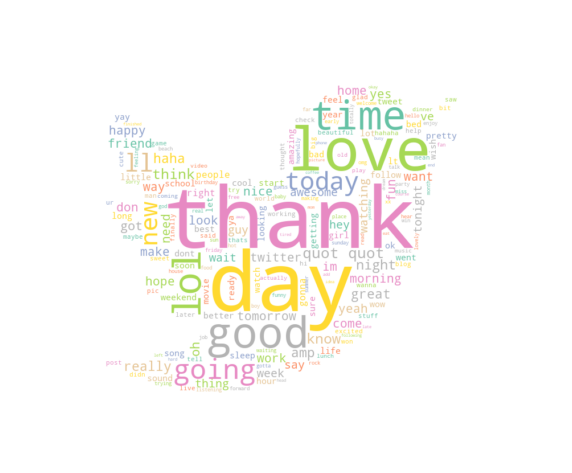

In [12]:
# pos word plot
mask = np.array(Image.open('twitter-icon.jpeg'))
test_pos_wc = WordCloud(background_color='white', colormap='Set2', mask=mask).generate(test_pos_word)

plt.figure(figsize=(10,10), facecolor="w")
plt.imshow(test_pos_wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('output-images/BoW/Postive-Tweets-WordCloud-in-Test-Data.png')
plt.show()

### **Neutral Tweets WordCloud in Test Data**

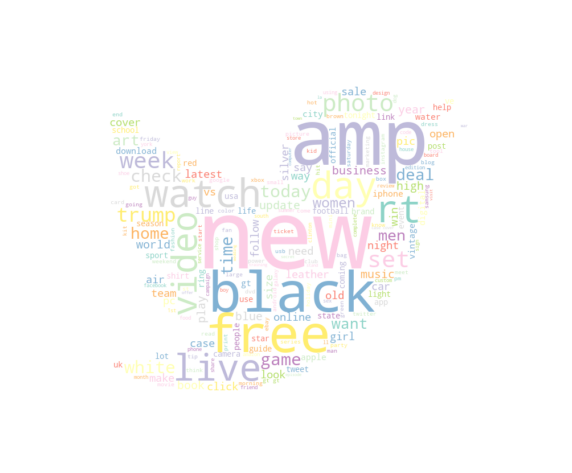

In [13]:
# neu word plot
mask = np.array(Image.open('twitter-icon.jpeg'))
test_neu_wc = WordCloud(background_color='white', colormap='Set3', mask=mask).generate(test_neu_word)

plt.figure(figsize=(10,10), facecolor="w")
plt.imshow(test_neu_wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('output-images/BoW/Neutral-Tweets-WordCloud-in-Test-Data.png')
plt.show()

### **Negative Tweets WordCloud in Test Data**

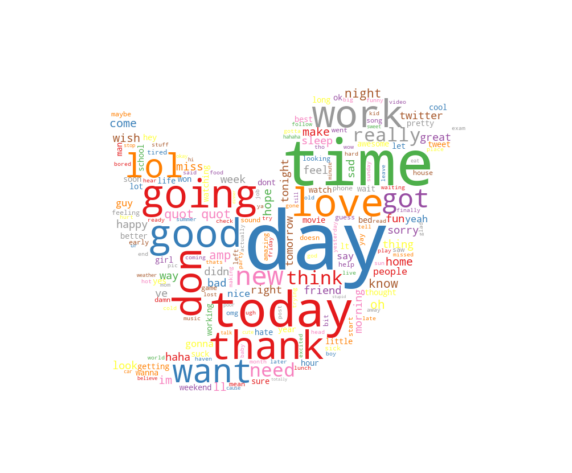

In [14]:
# negative word plot
mask = np.array(Image.open('twitter-icon.jpeg'))
test_neg_wc = WordCloud(background_color='white', colormap='Set1', mask=mask).generate(test_neg_word)

plt.figure(figsize=(10,10), facecolor="w")
plt.imshow(test_neg_wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('output-images/BoW/Negative-Tweets-WordCloud-in-Test-Data.png')
plt.show()

# **Feature Extraction**

In [15]:
X_train = []
X_test = []

# extract train features
for i in range(len(trained)):
    instance = [0]*len(vocab)
    curr_tweet = eval(trained['tweet'][i])
    for j in range(len(curr_tweet)):
        index = curr_tweet[j][0]
        val = curr_tweet[j][1]
        instance[index] = val
    X_train.append(instance)
    
# extract test features
for i in range(len(test)):
    instance = [0]*len(vocab)
    curr_tweet = eval(test['tweet'][i])
    for j in range(len(curr_tweet)):
        index = curr_tweet[j][0]
        val = curr_tweet[j][1]
        instance[index] = val
    X_test.append(instance)

# **KNN**

In [16]:
from scipy.sparse import csr_matrix
X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=20, algorithm='brute')
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)

In [18]:
# load measure metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [19]:
k = 20
knn_accuracy = round(accuracy_score(y_test, knn_pred)*100, 2)
knn_precision = round(precision_score(y_test, knn_pred, average='macro')*100, 2)
knn_recall = round(recall_score(y_test, knn_pred, average='macro')*100, 2)
knn_f1 = round(f1_score(y_test, knn_pred, average='macro')*100, 2)

print("Accuracy score for k = {0} is: {1}%".format(k,knn_accuracy))
print("Precision score for k = {0} is: {1}%".format(k,knn_precision))
print("Recall score for k = {0} is: {1}%".format(k,knn_recall))
print("F1 score for k = {0} is: {1}%".format(k, knn_f1))

Accuracy score for k = 20 is: 63.67%
Precision score for k = 20 is: 65.38%
Recall score for k = 20 is: 64.18%
F1 score for k = 20 is: 64.71%


In [20]:
knn_matrix = confusion_matrix(y_test, knn_pred)
knn_matrix = pd.DataFrame(knn_matrix)
knn_matrix = knn_matrix.rename(columns={0:'neg', 1:'neu', 2:'pos'}, index={0:'neg', 1: 'neu', 2: 'pos'})
knn_matrix

,neg,neu,pos
neg,4987,415,2693
neu,661,2593,641
pos,2259,562,5095


In [21]:
# Convert to Percentage Form
knn_matrix[['neg', 'neu', 'pos']] = knn_matrix[['neg', 'neu', 'pos']].apply(lambda x: round(x/x.sum(), 4), axis=1)
knn_matrix

,neg,neu,pos
neg,0.6161,0.0513,0.3327
neu,0.1697,0.6657,0.1646
pos,0.2854,0.0710,0.6436


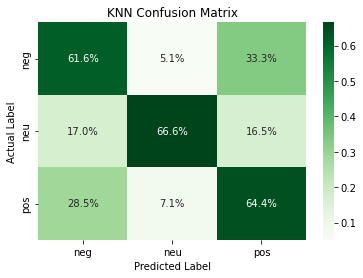

In [22]:
# KNN Confusion Matrix Plot #数字 数字
sns.heatmap(knn_matrix, annot=True, fmt=".1%", cmap='Greens', edgecolor='white')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('output-images/BoW/KNN-CM.png')
plt.show()

# **Naive Bayes Classifier**

## **Multinomial Naive Bayes Classifier**

In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)
mnb_pred = mnb_clf.predict(X_test)

In [24]:
# Multinomial Naive Bayes Performace Measures
mnb_accuracy = round(accuracy_score(y_test, mnb_pred)*100,2)
mnb_precision = round(precision_score(y_test, mnb_pred, average='macro')*100,2)
mnb_recall = round(recall_score(y_test, mnb_pred, average='macro')*100,2)
mnb_f1 = round(f1_score(y_test, mnb_pred, average='macro')*100,2)

print("Accuracy score for Multinomial Naive Bayes Classifier: {0}%".format(mnb_accuracy))
print("Precision score for Multinomial Naive Bayes Classifier: {0}%".format(mnb_precision))
print("Recall score for Multinomial Naive Bayes Classifier: {0}%".format(mnb_recall ))
print("F1 score for Multinomial Naive Bayes Classifier: {0}%".format(mnb_f1))

Accuracy score for Multinomial Naive Bayes Classifier: 73.08%
Precision score for Multinomial Naive Bayes Classifier: 74.87%
Recall score for Multinomial Naive Bayes Classifier: 74.48%
F1 score for Multinomial Naive Bayes Classifier: 74.67%


In [25]:
mnb_matrix = confusion_matrix(y_test, mnb_pred)
mnb_matrix = pd.DataFrame(mnb_matrix)
mnb_matrix = mnb_matrix.rename(columns={0:'neg', 1:'neu', 2:'pos'}, index={0:'neg', 1: 'neu', 2: 'pos'})
mnb_matrix

,neg,neu,pos
neg,5913,266,1916
neu,292,3169,434
pos,2083,368,5465


In [26]:
# Convert to Percentage Form
mnb_matrix[['neg', 'neu', 'pos']] = mnb_matrix[['neg', 'neu', 'pos']].apply(lambda x: round(x/x.sum(), 4), axis=1)
mnb_matrix

,neg,neu,pos
neg,0.7305,0.0329,0.2367
neu,0.0750,0.8136,0.1114
pos,0.2631,0.0465,0.6904


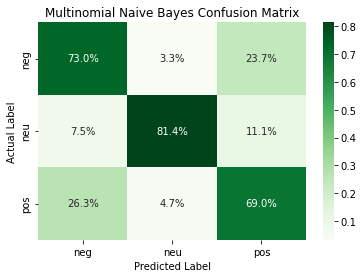

In [27]:
# Multinomial Naive Bayes Confusion Matrix
sns.heatmap(mnb_matrix, annot=True, fmt=".1%", cmap='Greens')
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('output-images/BoW/MNB-CM.png')
plt.show()

## **Gaussian Naive Bayes Classifier**

In [28]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train.todense(), y_train)
gnb_pred = gnb_clf.predict(X_test.todense())

In [29]:
# Gaussian Naive Bayes Performace Measures
gnb_accuracy = round(accuracy_score(y_test, gnb_pred)*100,2)
gnb_precision = round(precision_score(y_test, gnb_pred, average='macro')*100,2)
gnb_recall = round(recall_score(y_test, gnb_pred, average='macro')*100,2)
gnb_f1 = round(f1_score(y_test, gnb_pred, average='macro')*100,2)

print("Accuracy score for Gaussian Naive Bayes Classifier: {0}%".format(gnb_accuracy))
print("Precision score for Gaussian Naive Bayes Classifier: {0}%".format(gnb_precision))
print("Recall score for Gaussian Naive Bayes Classifier: {0}%".format(gnb_recall ))
print("F1 score for Gaussian Naive Bayes Classifier: {0}%".format(gnb_f1))

Accuracy score for Gaussian Naive Bayes Classifier: 58.31%
Precision score for Gaussian Naive Bayes Classifier: 59.73%
Recall score for Gaussian Naive Bayes Classifier: 64.61%
F1 score for Gaussian Naive Bayes Classifier: 58.23%


In [30]:
gnb_matrix = confusion_matrix(y_test, gnb_pred)
gnb_matrix = pd.DataFrame(gnb_matrix)
gnb_matrix = gnb_matrix.rename(columns={0:'neg', 1:'neu', 2:'pos'}, index={0:'neg', 1: 'neu', 2: 'pos'})
gnb_matrix

,neg,neu,pos
neg,4618,1902,1575
neu,75,3717,103
pos,2208,2435,3273


In [31]:
# Convert to Percentage Form
gnb_matrix[['neg', 'neu', 'pos']] = gnb_matrix[['neg', 'neu', 'pos']].apply(lambda x: round(x/x.sum(), 4), axis=1)
gnb_matrix

,neg,neu,pos
neg,0.5705,0.2350,0.1946
neu,0.0193,0.9543,0.0264
pos,0.2789,0.3076,0.4135


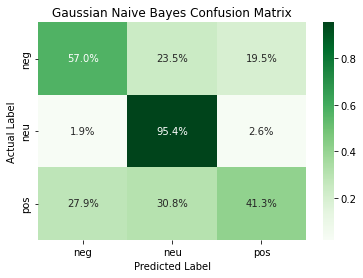

In [32]:
# Gaussian Naive Bayes Confusion Matrix
sns.heatmap(gnb_matrix, annot=True, fmt=".1%", cmap='Greens')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('output-images/BoW/GNB-CM.png')
plt.show()

# **Logistic Regression**

In [33]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear', multi_class='auto')
lr_model.fit(X_train.todense(), y_train)
lr_pred = lr_model.predict(X_test.todense())

In [34]:
# Logistic Regression Performace Measures
lr_accuracy = round(accuracy_score(y_test, lr_pred)*100,2)
lr_precision = round(precision_score(y_test, lr_pred, average='macro')*100,2)
lr_recall = round(recall_score(y_test, lr_pred, average='macro')*100,2)
lr_f1 = round(f1_score(y_test, lr_pred, average='macro')*100,2)

print("Accuracy score for Logistic Regression: {0}%".format(lr_accuracy))
print("Precision score for Logistic Regression: {0}%".format(lr_precision))
print("Recall score for Logistic Regression: {0}%".format(lr_recall ))
print("F1 score for Logistic Regression: {0}%".format(lr_f1))

Accuracy score for Logistic Regression: 74.14%
Precision score for Logistic Regression: 75.57%
Recall score for Logistic Regression: 75.9%
F1 score for Logistic Regression: 75.73%


In [35]:
lr_matrix = confusion_matrix(y_test, lr_pred)
lr_matrix = pd.DataFrame(lr_matrix)
lr_matrix = lr_matrix.rename(columns={0:'neg', 1:'neu', 2:'pos'}, index={0:'neg', 1: 'neu', 2: 'pos'})
lr_matrix

,neg,neu,pos
neg,5850,266,1979
neu,222,3290,383
pos,1877,421,5618


In [36]:
# Convert to Percentage Form
lr_matrix[['neg', 'neu', 'pos']] = lr_matrix[['neg', 'neu', 'pos']].apply(lambda x: round(x/x.sum(), 4), axis=1)
lr_matrix

,neg,neu,pos
neg,0.7227,0.0329,0.2445
neu,0.0570,0.8447,0.0983
pos,0.2371,0.0532,0.7097


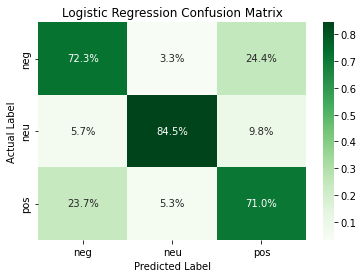

In [37]:
# Logistic Regression Confusion Matrix Plot
sns.heatmap(lr_matrix, annot=True, fmt=".1%", cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('output-images/BoW/LR-CM.png')
plt.show()

# **Random Forests**

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=50)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [39]:
# Random Forests Performace Measures
rf_accuracy = round(accuracy_score(y_test, rf_pred)*100,2)
rf_precision = round(precision_score(y_test, rf_pred, average='macro')*100,2)
rf_recall = round(recall_score(y_test, rf_pred, average='macro')*100,2)
rf_f1 = round(f1_score(y_test, rf_pred, average='macro')*100,2)

print("Accuracy score for Random Forests: {0}%".format(rf_accuracy))
print("Precision score for Random Forests: {0}%".format(rf_precision))
print("Recall score for Random Forests: {0}%".format(rf_recall ))
print("F1 score for Random Forests: {0}%".format(rf_f1))

Accuracy score for Random Forests: 62.73%
Precision score for Random Forests: 69.81%
Recall score for Random Forests: 58.54%
F1 score for Random Forests: 60.59%


In [40]:
rf_matrix = confusion_matrix(y_test, rf_pred)
rf_matrix = pd.DataFrame(rf_matrix)
rf_matrix = rf_matrix.rename(columns={0:'neg', 1:'neu', 2:'pos'}, index={0:'neg', 1: 'neu', 2: 'pos'})
rf_matrix

,neg,neu,pos
neg,6157,104,1834
neu,1846,1501,548
pos,2951,135,4830


In [41]:
# Convert to Percentage Form
rf_matrix[['neg', 'neu', 'pos']] = rf_matrix[['neg', 'neu', 'pos']].apply(lambda x: round(x/x.sum(), 4), axis=1)
rf_matrix

,neg,neu,pos
neg,0.7606,0.0128,0.2266
neu,0.4739,0.3854,0.1407
pos,0.3728,0.0171,0.6102


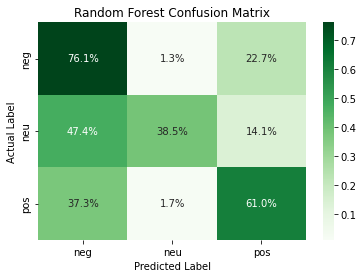

In [42]:
# Random Forest Confusion Matrix Plot
sns.heatmap(rf_matrix, annot=True, fmt=".1%", cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('output-images/BoW/RF-CM.png')
plt.show()

# **Support Vector Machine (SVM)**

In [43]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [44]:
svm_clf = SVC(decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

In [ ]:
# Support Vector Machine Performace Measures
svm_accuracy = round(accuracy_score(y_test, svm_pred)*100,2)
svm_precision = round(precision_score(y_test, svm_pred, average='macro')*100,2)
svm_recall = round(recall_score(y_test, svm_pred, average='macro')*100,2)
svm_f1 = round(f1_score(y_test, svm_pred, average='macro')*100,2)

print("Accuracy score for Logistic Regression: {0}%".format(svm_accuracy))
print("Precision score for Logistic Regression: {0}%".format(svm_precision))
print("Recall score for Logistic Regression: {0}%".format(svm_recall ))
print("F1 score for Logistic Regression: {0}%".format(svm_f1))

Accuracy score for Logistic Regression: 74.39%
Precision score for Logistic Regression: 75.86%
Recall score for Logistic Regression: 76.15%
F1 score for Logistic Regression: 76.0%


In [ ]:
svm_matrix = confusion_matrix(y_test, svm_pred)
svm_matrix = pd.DataFrame(svm_matrix)
svm_matrix = svm_matrix.rename(columns={0:'neg', 1:'neu', 2:'pos'}, index={0:'neg', 1: 'neu', 2: 'pos'})
svm_matrix

,neg,neu,pos
neg,5836,262,1997
neu,207,3297,391
pos,1830,410,5676


In [ ]:
# Convert to Percentage Form
svm_matrix[['neg', 'neu', 'pos']] = svm_matrix[['neg', 'neu', 'pos']].apply(lambda x: round(x/x.sum(), 4), axis=1)
svm_matrix

Text(33.0, 0.5, 'Actual Label')

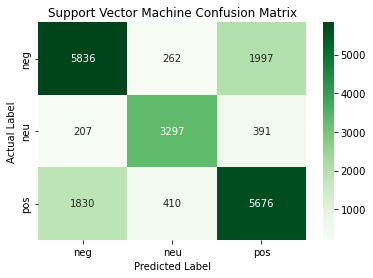

In [ ]:
# Support Vector Machine Confusion Matrix Plot
sns.heatmap(svm_matrix, annot=True, fmt=".1%", cmap='Greens')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('output-images/BoW/SVM-CM.png')
plt.show()

# **Multi-layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100),batch_size=512, max_iter=100,verbose=True)
mlp_clf.fit(X_train, y_train)
mlp_pred = mlp_clf.predict(X_test)

Iteration 1, loss = 0.63324444
Iteration 2, loss = 0.52491497
Iteration 3, loss = 0.49660815
Iteration 4, loss = 0.46115857
Iteration 5, loss = 0.41260187
Iteration 6, loss = 0.34897501
Iteration 7, loss = 0.28148402
Iteration 8, loss = 0.21958431
Iteration 9, loss = 0.17132439
Iteration 10, loss = 0.13634777
Iteration 11, loss = 0.11124961
Iteration 12, loss = 0.09334063
Iteration 13, loss = 0.08046336
Iteration 14, loss = 0.07187632
Iteration 15, loss = 0.06325099
Iteration 16, loss = 0.05891319
Iteration 17, loss = 0.05577188
Iteration 18, loss = 0.05473181
Iteration 19, loss = 0.05090986
Iteration 20, loss = 0.04907404
Iteration 21, loss = 0.04519648
Iteration 22, loss = 0.04143297
Iteration 23, loss = 0.03844269
Iteration 24, loss = 0.03762920
Iteration 25, loss = 0.03754852
Iteration 26, loss = 0.03884146
Iteration 27, loss = 0.04155517
Iteration 28, loss = 0.03963348
Iteration 29, loss = 0.03765381
Iteration 30, loss = 0.03372832
Iteration 31, loss = 0.03176387
Iteration 32, los

/Users/sw/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Multi-layer Perceptron Performace Measures
mlp_accuracy = round(accuracy_score(y_test, mlp_pred)*100,2)
mlp_precision = round(precision_score(y_test, mlp_pred, average='macro')*100,2)
mlp_recall = round(recall_score(y_test, mlp_pred, average='macro')*100,2)
mlp_f1 = round(f1_score(y_test, mlp_pred, average='macro')*100,2)

print("Accuracy score for Multi-layer Perceptron: {0}%".format(mlp_accuracy))
print("Precision score for Multi-layer Perceptron: {0}%".format(mlp_precision))
print("Recall score for Multi-layer Perceptron: {0}%".format(mlp_recall ))
print("F1 score for Multi-layer Perceptron: {0}%".format(mlp_f1))

Accuracy score for Multi-layer Perceptron: 69.79%
Precision score for Multi-layer Perceptron: 71.44%
Recall score for Multi-layer Perceptron: 71.78%
F1 score for Multi-layer Perceptron: 71.6%


In [ ]:
mlp_matrix = confusion_matrix(y_test, mlp_pred)
mlp_matrix = pd.DataFrame(mlp_matrix)
mlp_matrix = mlp_matrix.rename(columns={0:'neg', 1:'neu', 2:'pos'}, index={0:'neg', 1: 'neu', 2: 'pos'})
mlp_matrix

,neg,neu,pos
neg,5466,337,2292
neu,284,3171,440
pos,2186,474,5256


In [ ]:
# Convert to Percentage Form
mlp_matrix[['neg', 'neu', 'pos']] = mlp_matrix[['neg', 'neu', 'pos']].apply(lambda x: round(x/x.sum(), 4), axis=1)
mlp_matrix

Text(33.0, 0.5, 'Actual Label')

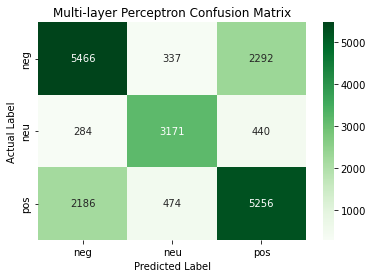

In [ ]:
# Multi-layer Perceptron Confusion Matrix Plot
sns.heatmap(mlp_matrix, annot=True, fmt=".1%", cmap='Greens')
plt.title('Multi-layer Perceptron Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.savefig('output-images/BoW/MLP-CM.png')
plt.show()